# Classification of Images from the CIFAR-10 Dataset using CNN.

The CIFAR-10 dataset consists of color 60,000 images each with 32 x 32 pixel in 10 classes, with 6,000 images per class. There are 50,000 training images and 10,000 test images.

* Class labels are: 

airplane : 0,
automobile : 1,
bird : 2,
cat : 3,
deer : 4,
dog : 5,
frog : 6,
horse : 7,
ship : 8,
truck : 9.

In [26]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils

## Load data.

In [1]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 11s 0us/step


### Show some sample images of data set with corresponding labels.

Example training images and their labels: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3]
Corresponding classes for the labels: ['frog', 'truck', 'truck', 'deer', 'automobile', 'automobile', 'bird', 'horse', 'ship', 'cat']


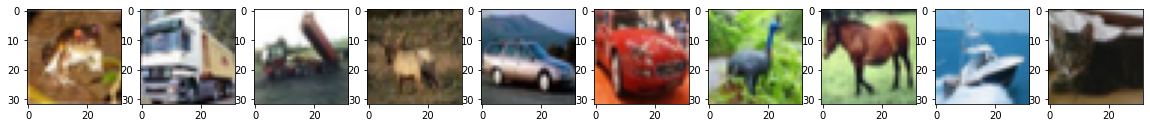

In [24]:
cifar10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('Example training images and their labels: ' + str([x[0] for x in y_train[0:10]])) 
print('Corresponding classes for the labels: ' + str([cifar10_classes[x[0]] for x in y_train[0:10]]))

fig, axarr = plt.subplots(1, 10)
fig.set_size_inches(20, 6)

for i in range(10):
    image = x_train[i]
    axarr[i].imshow(image)
plt.show()


In [17]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

## Preparing the dataset

1) Normalize the input data

In [25]:
X_train = x_train / 255
X_test = x_test / 255

2) One-hot encoding using keras for labels

In [32]:
num_classes =10
Y_train = np_utils.to_categorical(y_train,num_classes =10)
Y_test = np_utils.to_categorical(y_test, num_classes= 10)

In [31]:
print("Train data shapes")
print(X_train.shape)
print(Y_train.shape)
print("Test data shapes")
print(X_test.shape)
print(Y_test.shape)

Train data shapes
(50000, 32, 32, 3)
(50000, 10)
Test data shapes
(10000, 32, 32, 3)
(10000, 10)


# Build a CNN model to classify CIFAR -10 images.

In [33]:
model = Sequential()
# Add 2 convolutional layers
model.add(Conv2D(32, kernel_size= (3,3), strides=(1,1), padding='same', activation='relu', input_shape = (32,32,3)))
model.add(Conv2D(32, kernel_size = (3,3), strides=(1,1), padding='same', activation= 'relu'))
# Add maxpool layer
model.add(MaxPool2D(pool_size= (2,2)))

# Add flatten layer
model.add(Flatten())
# Add Dense layers for hidden and output

model.add(Dense(256, activation= 'relu'))
model.add(Dense(num_classes,activation= 'softmax'))

In [34]:
# Have a look at the summary of constructed CNN model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                        

In [35]:
# compile the model
model.compile(loss= 'categorical_crossentropy', metrics= ['accuracy'], optimizer= 'adam')

In [37]:
# Train the CNN model
Info = model.fit(X_train, Y_train, batch_size= 128, epochs= 10, verbose=2, validation_split= 0.2)

Epoch 1/10
313/313 - 118s - loss: 1.4578 - accuracy: 0.4765 - val_loss: 1.2673 - val_accuracy: 0.5579 - 118s/epoch - 378ms/step
Epoch 2/10
313/313 - 117s - loss: 1.0769 - accuracy: 0.6177 - val_loss: 1.0499 - val_accuracy: 0.6315 - 117s/epoch - 372ms/step
Epoch 3/10
313/313 - 117s - loss: 0.8988 - accuracy: 0.6852 - val_loss: 0.9642 - val_accuracy: 0.6689 - 117s/epoch - 373ms/step
Epoch 4/10
313/313 - 116s - loss: 0.7763 - accuracy: 0.7293 - val_loss: 0.9705 - val_accuracy: 0.6653 - 116s/epoch - 372ms/step
Epoch 5/10
313/313 - 116s - loss: 0.6693 - accuracy: 0.7649 - val_loss: 0.9061 - val_accuracy: 0.6877 - 116s/epoch - 372ms/step
Epoch 6/10
313/313 - 116s - loss: 0.5574 - accuracy: 0.8075 - val_loss: 0.9832 - val_accuracy: 0.6787 - 116s/epoch - 372ms/step
Epoch 7/10
313/313 - 116s - loss: 0.4449 - accuracy: 0.8474 - val_loss: 0.9940 - val_accuracy: 0.6845 - 116s/epoch - 371ms/step
Epoch 8/10
313/313 - 116s - loss: 0.3348 - accuracy: 0.8875 - val_loss: 1.0567 - val_accuracy: 0.6892 - 

With the below simple function we will be able to plot our training history.

In [41]:
def plotLosses(Info):  
    plt.plot(Info.history['loss'])
    plt.plot(Info.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

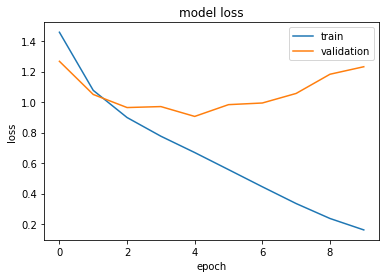

In [42]:
plotLosses(Info)

By the above loss plot, 
* the training loss is decreasing and,
* the validation loss decreased for some epochs and then it increased.
It is called as overfitting. 
* To fix this we need to Regularize our model by adding Dropouts to our CNN model. Let's do it and observe the changes.

# Regularization

Lets build the CNN model with dropouts

In [46]:
model= Sequential()
# Add 2 convolution layers
model.add(Conv2D(32,kernel_size= (3,3), strides=(1,1), padding='same', activation='relu', input_shape = (32,32,3)))
model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
# Add Dropaut Layer
model.add(Dropout(0.25))

# Add flatten layer
model.add(Flatten())
# Add Dense layers for hidden and output

model.add(Dense(256, activation= 'relu'))
model.add(Dense(num_classes,activation= 'softmax'))

In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2097408   
                                                      

In [48]:
model.compile(loss='categorical_crossentropy', metrics= ['accuracy'], optimizer= 'adam')

We will store the training loss values and metrics in a Info object, so we can visualize the training process later.

In [49]:
# Train the CNN model
Info = model.fit(X_train, Y_train, batch_size= 128, epochs= 10, verbose=2, validation_split= 0.2)

Epoch 1/10
313/313 - 120s - loss: 1.5268 - accuracy: 0.4532 - val_loss: 1.2994 - val_accuracy: 0.5444 - 120s/epoch - 383ms/step
Epoch 2/10
313/313 - 119s - loss: 1.1584 - accuracy: 0.5895 - val_loss: 1.1151 - val_accuracy: 0.6071 - 119s/epoch - 380ms/step
Epoch 3/10
313/313 - 119s - loss: 0.9950 - accuracy: 0.6501 - val_loss: 1.0450 - val_accuracy: 0.6394 - 119s/epoch - 379ms/step
Epoch 4/10
313/313 - 118s - loss: 0.8793 - accuracy: 0.6941 - val_loss: 0.9617 - val_accuracy: 0.6648 - 118s/epoch - 376ms/step
Epoch 5/10
313/313 - 118s - loss: 0.7771 - accuracy: 0.7272 - val_loss: 0.9417 - val_accuracy: 0.6753 - 118s/epoch - 376ms/step
Epoch 6/10
313/313 - 119s - loss: 0.6919 - accuracy: 0.7596 - val_loss: 0.9230 - val_accuracy: 0.6843 - 119s/epoch - 379ms/step
Epoch 7/10
313/313 - 119s - loss: 0.5977 - accuracy: 0.7919 - val_loss: 0.9237 - val_accuracy: 0.6877 - 119s/epoch - 380ms/step
Epoch 8/10
313/313 - 120s - loss: 0.5145 - accuracy: 0.8224 - val_loss: 0.9351 - val_accuracy: 0.6946 - 

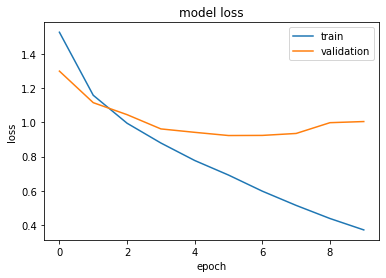

In [50]:
plotLosses(Info)

Compare with the CNN model with out dropout layer, current model is somewhat better. BUt still lot more can be to improved to get better results.

**Evaluating the our CNN model**

In [51]:
score = model.evaluate(X_test, Y_test, batch_size=128, verbose=0)

In [52]:
print(model.metrics_names)
print(score)

['loss', 'accuracy']
[1.0461069345474243, 0.6875]


# The END






